# MMM - Problem Set 3 #
## Jan Suchánek	##


# 1) Consider the simplified IS-LM model specified in the IS-LM_lecture #

Firstly, I obtain the phase diagram using the code from seminar:

In [1]:
import sympy as sp
import sympy.abc as sbc
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import FloatSlider

sp.init_printing()

In [2]:
def particular(eq, x_cond, y_cond, points = 150, tmin = -2, tmax = 2):
    xt0 = eq[0].rhs.subs(t, 0)                                               # substitute t = 0 into both equations
    yt0 = eq[1].rhs.subs(t, 0)
    
    conds = sp.solve([sp.Eq(xt0, x_cond), sp.Eq(yt0, y_cond)])               # find the parameter values
    c1 = sp.Symbol('C1')
    c2 = sp.Symbol('C2')
    
    sol_p = [i.subs([(c1, conds[c1]), (c2, conds[c2])]) for i in eq]         # and substitute them back into equations

    t_vals = np.linspace(tmin, tmax, points)                                 # define t interval
    x_p = np.zeros(points)
    y_p = np.zeros(points)

    xfun = sp.lambdify(t, sol_p[0].rhs)
    yfun = sp.lambdify(t, sol_p[1].rhs)
    
    for i in range(points):                                                  # and calculate x, y values
        x_p[i] = xfun(t_vals[i])
        y_p[i] = yfun(t_vals[i])
    
    return(x_p, y_p)

In [3]:
def vector_field(xfun, yfun, xvals, yvals):
    gridsize = len(xvals) * len(yvals)            # the grid [x,y]
    xa_vals = np.zeros(gridsize)                  # arrow positions x, y
    ya_vals = np.zeros(gridsize)
    dxa = np.zeros(gridsize)                      # arrow directions x, y
    dya = np.zeros(gridsize)
    
    p = 0
    for i in xvals:                               # for every x value
        for j in yvals:                           # for every y value
            xa_vals[p] = i                        # save the combination
            ya_vals[p] = j
            dxa[p] = xfun(i, j)                   # calculate both derivatives
            dya[p] = yfun(i, j)
            p += 1                                # increment the position
    
    return(xa_vals, ya_vals, dxa, dya)

In [4]:
#variables needed for setup
t = sp.symbols('t', real=True)

y = sp.Function('y')(t)
r = sp.Function('r')(t)
e = sp.Function('e')(t)
md = sp.Function('md')(t)

alpha = sbc.alpha
beta = sbc.beta

a = sp.symbols('a')
b = sp.symbols('b')
h = sp.symbols('h')
k = sp.symbols('k')
m0 = sp.symbols('m0')
T = sp.symbols('T')
u = sp.symbols('u')
c1 = sp.symbols('C1')
c2 = sp.symbols('C2')

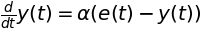

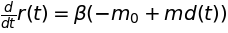

In [5]:
exp = sp.Eq(e, a + b*(1 - T)*y - h*r)
mdem = sp.Eq(md, k*y - u*r)

display(exp, mdem)

adj_g = sp.Eq(y.diff(), alpha*(e - y))
adj_m = sp.Eq(r.diff(), beta*(md - m0))

display(adj_g, adj_m)

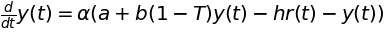

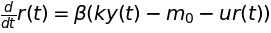

In [6]:
yt = adj_g.subs(e, exp.rhs)
rt = adj_m.subs(md, mdem.rhs)

display(yt, rt)

IS = sp.solve(yt.subs(y.diff(), 0), r)[0]
LM = sp.solve(rt.subs(r.diff(), 0), r)[0]

display(sp.Eq(r, IS), sp.Eq(r, LM))

In [7]:
#chosen values of parameters
IS_param = [(alpha, 3), (T, 0.3), (b, 0.6), (a, 5), (h, 1)]
LM_param = [(beta, 2), (k, 3), (m0, 3), (u, 2.5)]

In [8]:
IS_s = IS.subs(IS_param)
LM_s = LM.subs(LM_param)

display(sp.Eq(r, IS_s), sp.Eq(r, LM_s))

In [9]:
y_eq = sp.solve(sp.Eq(LM_s, IS_s), y)[0]
r_eq = IS_s.subs(y, y_eq)

display(sp.Eq(y,y_eq), sp.Eq(r, r_eq))

In [10]:
lower = -10
upper = 20

y_vals = np.linspace(lower, upper)

rval_IS = [float(IS_s.subs(y, i)) for i in y_vals]
rval_LM = [float(LM_s.subs(y, i)) for i in y_vals]

In [11]:
yt_s = yt.rhs.subs(IS_param)
rt_s = rt.rhs.subs(LM_param)

rspace = np.linspace(lower, upper, 15)
yspace = np.linspace(lower, upper, 15)

yfun = sp.lambdify((y, r), yt_s)
rfun = sp.lambdify((y, r), rt_s)

y_a, r_a, y_ad, r_ad = vector_field(yfun, rfun, yspace, rspace)

In [12]:
eigen = sp.Matrix([
    sp.Poly(rt_s).coeffs()[:-1],
    sp.Poly(yt_s).coeffs()[:-1]
]).eigenvects()

eigen_vals = y_vals * (-1) * sp.re(eigen[0][2][0][0].evalf()) + r_eq

eigen

⎡⎛                               ⎡⎡0.543333333333333 + 1.30567564459512⋅ⅈ⎤⎤⎞  
⎢⎜-3.37 - 3.91702693378537⋅ⅈ, 1, ⎢⎢                                      ⎥⎥⎟, 
⎣⎝                               ⎣⎣                 1.0                  ⎦⎦⎠  

⎛                               ⎡⎡0.543333333333333 - 1.30567564459512⋅ⅈ⎤⎤⎞⎤
⎜-3.37 + 3.91702693378537⋅ⅈ, 1, ⎢⎢                                      ⎥⎥⎟⎥
⎝                               ⎣⎣                 1.0                  ⎦⎦⎠⎦

In [13]:
sol = sp.dsolve(
    [sp.Eq(y.diff(), yt_s), sp.Eq(r.diff(), rt_s)],
    [y, r]
)
sol

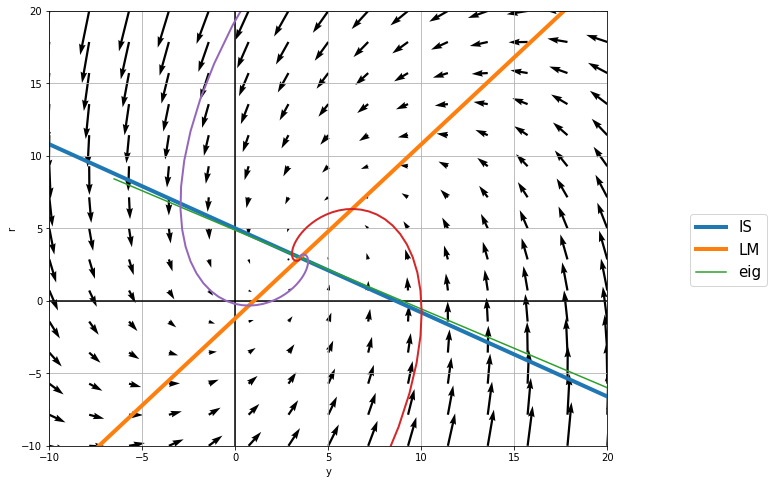

In [14]:
fig = plt.figure(figsize = (10, 8))                                   # bigger plot

plt.xlabel('y')
plt.ylabel('r')
plt.xlim(lower, upper)
plt.ylim(lower, upper)
plt.grid()

plt.plot(y_vals, rval_IS, linewidth = 4, label = "IS")               
plt.plot(y_vals, rval_LM, linewidth = 4, label = "LM")

plt.plot(y_vals + y_eq, eigen_vals, label = "eig")

plt.legend(bbox_to_anchor=(1.30, 0.55), prop={'size': 15})             # add legend, outside of the plot

plt.hlines(0, xmin = lower, xmax = upper, color = 'black')             # strengthen the x axis
plt.vlines(0, ymin = lower, ymax = upper, color = 'black')             # strengthen the y axis

plt.quiver(y_a, r_a, y_ad, r_ad)                                       # arrows

x0p, y0p = particular(sol, 10, 0)                                      # 2 particular solutions
plt.plot(x0p, y0p, linewidth = 2)

x1p, y1p = particular(sol, 2, 0)
plt.plot(x1p, y1p, linewidth = 2)

plt.show()

### a)	Comment extensively all features of the plot (all lines, arrows, curves ,...). From the comments it must be obvious that you understand the IS-LM model and how the model is illustrated using the phase diagram. 

The horizontal axis stands for y(t), which is the real income in time. The vertical axis - r(t), is the
interest rate throughout time.


This diagram is based on a system of two differential equations of first order, which describe
evolution of both real interest rate and real income. We are interested in the case that none of
these variables change and they remain constant. Therefore we set left-hand sides of both of these
equations to be equal to zero (first derivatives of both variables are equal to zero - therefore values of
both variables are neither growing or falling). Then from both equations we can express r(t). This gives us equations for IS curve and LM curve. IS curve equation is associated with first derivative
of r(t) being equal to zero and LM curve equation is associated with first derivative of y(t) being
equal to zero. In the intersection of IS and LM curves equilibrium can be found.

Of course we can find ourselves in a situation when values of r(t) and y(t) are outside of the curves.
In that case, we are left with with four options - the curves leave us with four areas. In these areas,
we can take any random values of r(t) and y(t) (we actually do not need to have the specific values,
we know that each of these variables have certain properties in each of those four areas) and plug
them back into the original system of equations. By doing this we can find out whether values of
y(t) and r(t) will grow or fall. If we determine behaviour of r(t) and y(t) in these areas, we can
determine how will the system tend to behave - whether the variables will converge to equilibrium
or not. All of this is graphically symbolized in the graph by the black arrows.

### b)	Prepare an interactive phase diagram using the predefined function update() and widgets.interact() (consult the first seminar if needed). You should parametrise and briefly describe every argument of the function update(). You will use this plot to answer the following points.

In [32]:
ISfun = sp.lambdify((a, b, h, T, y), IS)
LMfun = sp.lambdify((k, m0, u, y), LM)

# define the update function
def update(a_v = 3, alpha_v = 0.50, b_v = 0.30, beta_v = 0.60, h_v = 0.3, k_v = 2, m0_v = 2, T_v = 0.1, u_v = 0.5):
    
    # LINE VALUES
    rval_y = [ISfun(a_v, b_v, h_v, T_v, i) for i in y_vals]
    rval_r = [LMfun(k_v, m0_v, u_v, i) for i in y_vals]
    
    # SUBSTITUTE & SOLVE particular solution
    y_s = yt.subs([(a, a_v), (alpha, alpha_v), (b, b_v), (h, h_v), (T, T_v)])
    r_s = rt.subs([(beta, beta_v), (k, k_v), (m0, m0_v), (u, u_v)])
    
    y_func = sp.Function('y')(t) 
    r_func = sp.Function('r')(t)
    sol = sp.dsolve([y_s, r_s], [y_func, r_func])
    
    y_partic, r_partic = particular(sol, 10, 4, 5000, -50, 100)
    
    # PREPARE GRID & VECTORFIELD
    rspace = np.linspace(lower, upper, 15)
    yspace = np.linspace(lower, upper, 15)

    yfun = sp.lambdify((y, r), y_s.rhs)
    rfun = sp.lambdify((y, r), r_s.rhs)

    y_a, r_a, y_ad, r_ad = vector_field(yfun, rfun, yspace, rspace)
    
    # PLOT
    fig = plt.figure(figsize=(10, 8))

    plt.xlabel('y')
    plt.ylabel('r')
    plt.xlim(lower, upper)
    plt.ylim(lower, upper)
    plt.grid()

    plt.plot(y_vals, rval_y, linewidth = 4, label = "IS")               
    plt.plot(y_vals, rval_r, linewidth = 4, label = "LM")
    plt.legend(bbox_to_anchor = (1.30, 0.55), prop = {'size': 15})

    plt.hlines(0, xmin = lower, xmax = upper, color = 'black')
    plt.vlines(0, ymin = lower, ymax = upper, color = 'black')

    plt.plot(y_partic, r_partic)
    plt.quiver(y_a, r_a, y_ad, r_ad, width = 0.002)
    plt.show()

In [33]:
def fs(val, min, max, step):
    return FloatSlider(value=val, min=min, max=max, step=step, continuous_update = False)

In [52]:
widgets.interact(update, 
                 a_v = fs(5, 0, 20, 1),
                 alpha_v = fs(3, 0.01, 10, 1),
                 b_v = fs(0.6, 0.01, 0.99, 0.05),
                 beta_v = fs(2, 0.01, 10, 1),
                 h_v = fs(1, 0.01, 10, 1),
                 k_v = fs(3, 0, 10, 1), 
                 m0_v = fs(3, 1, 10, 1),
                 T_v = fs(0.3, 0, 1, 0.1),
                 u_v = fs(2.5, -3, 10, 0.05))

interactive(children=(FloatSlider(value=5.0, continuous_update=False, description='a_v', max=20.0, step=1.0), …

<function __main__.update(a_v=3, alpha_v=0.5, b_v=0.3, beta_v=0.6, h_v=0.3, k_v=2, m0_v=2, T_v=0.1, u_v=0.5)>

### c) Comment briefly (but precisely) how the plot develops with change in ‘a’ parameter. Describe very briefly the economic meaning of ‘a’ parameter, meaning of its change and economic implications.  ###

The ‘a’ parameter stands for autonomous expenditure, which is always positive. Autonomous
expenditure is independent of income and it must be met. It is considered as necessary on both
government and individual level. Majority of government spending is considered as autonomous
expenditure, because it is required to ensure stability and minimal standard of living.
Its effect is captured in the IS curve. In the frame of IS curve, a rise in value of ‘a’ will cause an
upward shift of the IS curve and vice versa.

#### a)	‘liquidity trap’ 
Liquidity trap occurs when parameter "k" (which is positively linked to real income) is equal to zero (LM is a horizontal line). Also, interest rates cannot be negative, therefore the intersection of the LM line with y-axis cannot be below zero. That means that -m0/u has to be positive -> "u" must be negative (we cannot have negative money supply m0). With "u" being negative, money demand is positively related to interest rate. Also with "k" being equal to zero, there is no change in interest rate no matter the output.

Example illustration is provided below using interactive plot with set default values.

In [55]:
widgets.interact(update, 
                 a_v = fs(5, 0, 20, 1),
                 alpha_v = fs(3, 0.01, 10, 1),
                 b_v = fs(0.6, 0.01, 0.99, 0.05),
                 beta_v = fs(2, 0.01, 10, 1),
                 h_v = fs(1, 0.01, 10, 1),
                 k_v = 0, 
                 m0_v = fs(3, 1, 10, 1),
                 T_v = fs(0.3, 0, 1, 0.1),
                 u_v = fs(-3, -3, -0.01, 0.01))

interactive(children=(FloatSlider(value=5.0, continuous_update=False, description='a_v', max=20.0, step=1.0), …

<function __main__.update(a_v=3, alpha_v=0.5, b_v=0.3, beta_v=0.6, h_v=0.3, k_v=2, m0_v=2, T_v=0.1, u_v=0.5)>

#### b)	‘crowding out’
Crowding out occurs when parameter "u" (which is indicates relationship between real interest rate and money supply) is very close to zero (LM line becomes vertical). This implies that the slope of of LM line is so high that the line never intersects the y-axis.

Example illustration is provided below using interactive plot with set default values.

In [59]:
widgets.interact(update, 
                 a_v = fs(5, 0, 20, 1),
                 alpha_v = fs(3, 0.01, 10, 1),
                 b_v = fs(0.6, 0.01, 0.99, 0.05),
                 beta_v = fs(2, 0.01, 10, 1),
                 h_v = fs(1, 0.01, 10, 1),
                 k_v = fs(3, 0, 10, 1), 
                 m0_v = fs(3, 1, 10, 1),
                 T_v = fs(0.3, 0, 1, 0.1),
                 u_v = fs(0.01, 0.001, 0.2, 0.001))

interactive(children=(FloatSlider(value=5.0, continuous_update=False, description='a_v', max=20.0, step=1.0), …

<function __main__.update(a_v=3, alpha_v=0.5, b_v=0.3, beta_v=0.6, h_v=0.3, k_v=2, m0_v=2, T_v=0.1, u_v=0.5)>

### e) Describe in words efficiency of fiscal and monetary policy according to the model in the respective cases.  ###

#### Liquidity trap:
Expansionary <b>fiscal policy</b> is effective as it stimulates increase in private sector saving and raises money supply by adding more money to circular flow. Fiscal policy "influences" the IS curve, therefore this logic can also be seen in the graph: when IS is shifted upwards (e.g. increase in governemnt spending), y inreases; when the slope of IS changes (e.g. T decreases), y increases.

<b>Monetary policy</b> is ineffective because the interest rate is nearly zero, thus the opportunity cost of holding money becomes zero. Even in the case when the central bank increases the money supply to stimulate the economy, individuals will rather accumulate money instead of investing them.

#### Crowding out:

<b>Fiscal policy</b> in this case does not have effect on y, only on interest rates (since the LM curve is vertical). Therefore, it is ineffective.

# 2) Bellman equation and Ramsey model #

## Bellman equation:  
$V(k_t)=\underset{k_{t+1}}{\operatorname{max}}(u(f(k_t)-k_{t+1})+\beta V(k_{t+1}))$  

Iterations:  
$V_{j+1}(k_t) = \underset{k_{t+1}}{\operatorname{max}}(u(f(k_t) - k_{t+1}) + \beta V_j(k_{t+1}))$

In [63]:
# A is technological progress
# alpha is cobb-douglas parameter
# beta is the discount factor
# kspace is the interval on which we optimise the function
def bellmanRam(A, alpha, beta, kspace, iters = 200, toler = 1e-6):
    ksize = len(kspace) # max number of iterations

    V_old = np.zeros(ksize)             # vector of zeros
    V_new = np.zeros([ksize, ksize])    # matrix of zeros
    
    for j in range(iters):
        diff = 0                        # original difference
        for t in range(ksize):             # over k_t
            kt = kspace[t]
            for t1 in range(ksize):         # over k_t1
                kt1 = kspace[t1]
                V_new[t,t1] = np.log(A*kt**alpha - kt1) + beta*V_old[t1] #rewrites zeros in matrix of zeros by computed values

            V_max, posmax = (np.nanmax(V_new, axis = 1), # position of the maximum utility and estimate
                             np.argmax(V_new, axis = 1))
            diff += abs(V_max[t] - V_old[t1])            # how is it different from the old one

        if diff <= toler:                                #difference smaller than tolerance means convergence
            break
        else:                         # else we rewrite the old function and save the optimal consumption and run it again
            V_old = V_max
            kopt = kspace[posmax]
    return(kspace, kopt)              # the function returns optimal capital and interval

In [65]:
kspace, kopt = bellmanRam(A = 10, alpha = 0.3, beta = 0.9, kspace = np.arange(2, 10, 0.05))

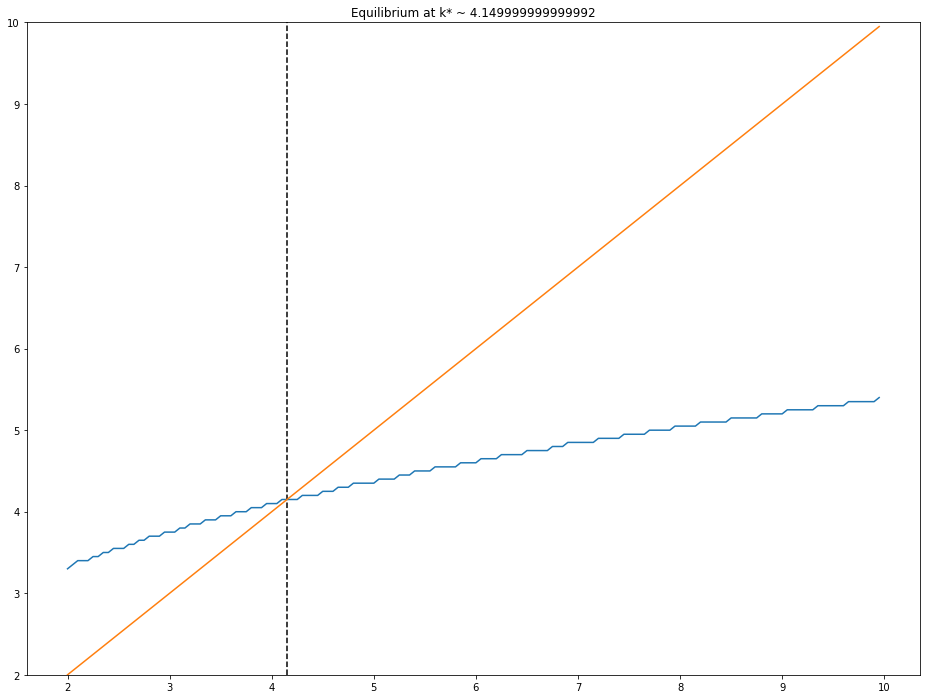

In [66]:
fig = plt.figure(figsize=(16, 12))
plt.title('Equilibrium at k* ~ ' + str(kspace[kopt == kspace].mean()))
plt.plot(kspace, kopt)
plt.plot(kspace, kspace)
_ = plt.ylim(2,10)
_ = plt.vlines(kspace[kopt == kspace].mean(), 2, 10, linestyles = 'dashed', color = 'black')

# Problem 2

In [21]:
from ipywidgets import IntProgress

import random as rd

import numpy as np
import matplotlib.pyplot as plt

Bellman equation:  
$V(k_t)=\underset{k_{t+1}}{\operatorname{max}}(u(f(k_t)-k_{t+1})+\beta V(k_{t+1}))$  

Iterations:  
$V_{j+1}(k_t) = \underset{k_{t+1}}{\operatorname{max}}(u(f(k_t) - k_{t+1}) + \beta V_j(k_{t+1}))$

## a) & b)

In [22]:
#A is tech. growth
#alpha is cobb-goudlas parameter
#beta is discount factor
#kspace is definition of the interval on which we define the function
def bellmanRam(A, alpha, beta, kspace, iters = 200, toler = 1e-6):
    ksize = len(kspace) #iters is the max number of iterations; toler is the convergence parameter
                        
    V_old = np.zeros(ksize) #vector of zeros (value mapping), it is the initial guess
    V_new = np.zeros([ksize, ksize]) # calculated below, originally matix of 0s
    
    for e in range(iters):
        diff = 0                           # original difference
        for j in range(ksize):             # over k_t
            kt = kspace[j]
            for i in range(ksize):         # over k_t1
                kt1 = kspace[i]
                V_new[j,i] = np.log(A*kt**alpha - kt1) + beta*V_old[i] # matrix with all values from this computation

            V_max, posmax = (np.nanmax(V_new, axis = 1),   # position of the maximum utility & the estimate
                             np.argmax(V_new, axis = 1))
            diff += abs(V_max[j] - V_old[j])               # how is it different from the old one 

        if diff <= toler:                                  # if the differemce is smaller than tolerance, then we have convergence
            break
        else:                                              # otherwise, we rewrite the old function and save the optimal consumption and run it again
            V_old = V_max
            kopt = kspace[posmax]
    
    return(kspace, kopt)                                  # the function gives us the optimal k and the interval

In [23]:
kspace, kopt = bellmanRam(A = 12, alpha = 0.30, beta = 0.90, kspace = np.arange(2, 10, 0.05))
#now I apply it for the given numbers and interval

## c)

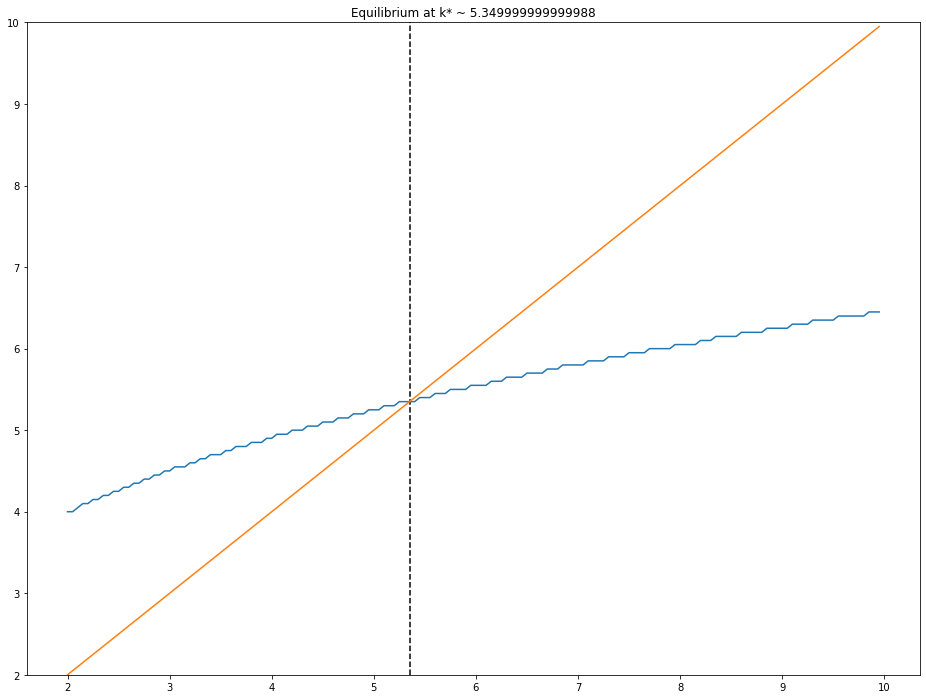

In [24]:
#now we plot
fig = plt.figure(figsize=(16, 12))
plt.title('Equilibrium at k* ~ ' + str(kspace[kopt == kspace].mean())) #this will print the equilibrium (optimal choices for k from the iterations&45°line intersection)
plt.plot(kspace, kopt)
plt.plot(kspace, kspace)
_ = plt.ylim(2,10)
_ = plt.vlines(kspace[kopt == kspace].mean(), 2, 10, linestyles = 'dashed', color = 'black') # intercept vertical line

We can use this plot to find the equlibrium since it shows the intersection of the 45° line and the optimal choices for $k$ (as calculated by the iterations).

## d) 

The equilibrium is already calculated in the graph. However, we can get a more precise estimate by decreasing the last value in the kspace specification.

In [25]:
str(kspace[kopt == kspace].mean())       #the original

'5.349999999999988'

In [26]:
kspace, kopt = bellmanRam(A = 12, alpha = 0.30, beta = 0.90, kspace = np.arange(2, 10, 0.03))                 # decreased to 0.03

In [27]:
str(kspace[kopt == kspace].mean())     #printing the value

'5.359999999999978'

In [28]:
kspace, kopt = bellmanRam(A = 12, alpha = 0.30, beta = 0.90, kspace = np.arange(2, 10, 0.02))

In [29]:
str(kspace[kopt == kspace].mean())

'5.360000000000003'

In [30]:
kspace, kopt = bellmanRam(A = 12, alpha = 0.30, beta = 0.90, kspace = np.arange(2, 10, 0.01))  #this is my last "decrease" since this one already took pretty long to process

In [31]:
str(kspace[kopt == kspace].mean())

'5.359999999999928'

I conclude that the equilibirum k* is 5.359999999999928 (as this is what I got with the "densiest" mesh).

In [62]:
V_new = np.zeros([2, 2])
V_new

array([[0., 0.],
       [0., 0.]])